In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
from fastai import *
from fastai.vision import *
from tqdm import tqdm
import imageio

In [3]:
path = Path('/home/jupyter/.fastai/data/camvid/')
path.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images')]

In [4]:
path_lbl = path/'labels'
path_img = path/'images'

In [5]:
file_names = get_image_files(path_img)
file_names[:5]

[PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_007470.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_008700.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_010320.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/Seq05VD_f02310.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images/0001TP_008310.png')]

In [6]:
label_names = get_image_files(path_lbl)
label_names[:5]

[PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_07170_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_007170_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_006690_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/0016E5_06600_P.png'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels/Seq05VD_f04050_P.png')]

(torch.Size([3, 720, 960]), None)

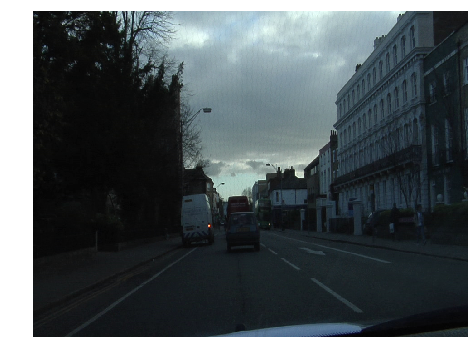

In [9]:
test_img = file_names[0]
img = open_image(test_img)
img.shape, img.show(figsize=(8,6))

In [10]:
get_label = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

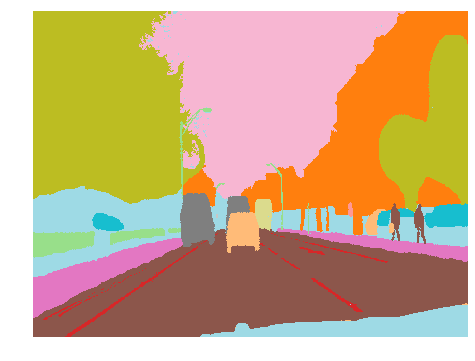

In [11]:
mask = open_mask(get_label(test_img))
mask.show(figsize=(8,6), alpha=1)

In [13]:
mask.data

tensor([[[26, 26, 26,  ...,  4,  4,  4],
         [26, 26, 26,  ...,  4,  4,  4],
         [26, 26, 26,  ...,  4,  4,  4],
         ...,
         [17, 17, 17,  ..., 30, 30, 30],
         [17, 17, 17,  ..., 30, 30, 30],
         [17, 17, 17,  ..., 30, 30, 30]]])

In [14]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

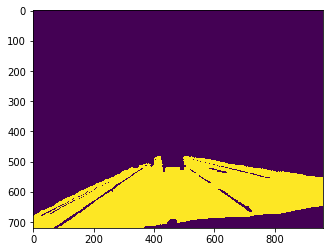

In [41]:
mask = imageio.imread(get_label(test_img))
road = np.zeros((720,960))
road[np.where(mask==17)[0], np.where(mask==17)[1]] = 1
plt.imshow(road)

In [105]:
height, width = img.shape[1], img.shape[2]
label_df = pd.DataFrame(columns=['name', 'mask'])
roads = np.zeros((len(label_names), height, width, 1), dtype=np.int8)

for n in tqdm(range(len(file_names))):
    
    mask = imageio.imread(get_label(file_names[n]))
    road = np.zeros((720,960))
    road[np.where(mask==17)[0], np.where(mask==17)[1]] = 1
    label_df = label_df.append({'name':f'{file_names[n].stem}{file_names[n].suffix}',
                                'mask': torch.from_numpy(road)},
                               ignore_index=True) 

100%|██████████| 701/701 [00:07<00:00, 90.01it/s]


In [106]:
label_df.head()

,name,mask
0,0001TP_007470.png,"[[tensor(0., dtype=torch.float64), tensor(0., ..."
1,0001TP_008700.png,"[[tensor(0., dtype=torch.float64), tensor(0., ..."
2,0001TP_010320.png,"[[tensor(0., dtype=torch.float64), tensor(0., ..."
3,Seq05VD_f02310.png,"[[tensor(0., dtype=torch.float64), tensor(0., ..."
4,0001TP_008310.png,"[[tensor(0., dtype=torch.float64), tensor(0., ..."


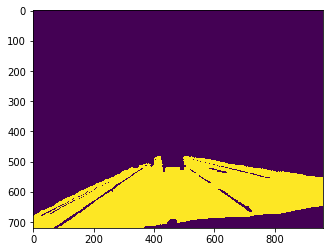

In [107]:
plt.imshow(label_df.iloc[0]['mask'])

### Dataset Creation

In [108]:
src_size = np.array(img.shape[1:])
src_size

array([720, 960])

In [109]:
size = src_size // 2
bs = 4

In [110]:
get_road_label = lambda x: label_df[label_df.name == f'{x.stem}{x.suffix}'].iloc[0]['mask']

In [111]:
new_codes = ['no_road', 'road']

In [112]:
get_label(file_names[0])

PosixPath('/home/jupyter/.fastai/data/camvid/labels/0001TP_007470_P.png')

In [113]:
get_road_label(file_names[0])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [122]:
np.loadtxt(path/'valid.txt', dtype=str)

array(['0016E5_07959.png', '0016E5_07961.png', '0016E5_07963.png', '0016E5_07965.png', ..., '0016E5_08153.png',
       '0016E5_08155.png', '0016E5_08157.png', '0016E5_08159.png'], dtype='<U16')